In [1]:
#Challenge

# 1) Import your data into a Pandas DataFrame.
# 2) Merge your DataFrames.
# 3) Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# 4) Determine the mean, median, and mode for the following:
# 5) The total number of rides for each city type.
# 6) The average fares for each city type.
# 7) The total number of drivers for each city type.
# 8) Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# 9) The number of rides for each city type.
# 10) The fares for each city type.
# 11) The number of drivers for each city type.
# 12) Create a pie chart that visualizes each of the following data for each city type:
# 13) The percent of total fares.
# 14) The percent of total rides.
# 15) The percent of total drivers.

In [2]:
#Load the CSVs
#Add Matplotlib inline magic command
%matplotlib inline

#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
#import os if you wan to load CSV files via "os.path.join()"



In [3]:
# Load the CSVs
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [4]:
# 1) Import your data into a Pandas DataFrame.
#Read the City and Ride data and store into a Pandas DataFrame
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

In [5]:
#view city_data_df
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
#view ride_data_df
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [7]:
#Inspect the data for city_data_df
# 1a) Get the columns and the rows that are not null.
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [8]:
# 1b) Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# 2) Make sure the driver_count column has an integer data type.
# Get the data types of each column.
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [10]:
# 3a)Find out how many data points there are for each type of city.
#Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# 3b)Find out how many data points there are for each type of city.
#Get the number of data points from the urban cities
sum(city_data_df["type"]=="Urban")


66

In [12]:
#Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [13]:
#Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [14]:
#Inspect the data for ride_data_df
# 1a) Get all the rows that contain null values.
#Get the columns and the rows that are not null using count
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# 1b) Get all the rows that contain null values.
#Get the columns and the rows that are not null using isnull().sum()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# 2) Make sure the fare and ride_id columns are numerical data types to perform calculations
#Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
#DataFrames are clean....you can proceed to merge DataFrames

# 2) Merge your DataFrames.
#Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# 3) Create a bubble chart that showcases the average fare versus the total number of rides
#with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# TIP: to be more efficient create separate DataFrames for each type and then Data Series for each step


#steps to create a bubble chart:
# 1) To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
# 2) To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
# 3) To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.

In [19]:
#Create the Urban City DataFrame
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
#Create the Suburban City DataFrame
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [21]:
#Create the Rural City DataFrame
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [22]:
#To get the number of rides for each city by each type of city, we have to create a Series where the index
#is the name of the city and the column is the number of rides for that city.

#Create a Data Series with one column of the DataFrame use groupby()
#Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [23]:
#Get the number of rides for suburban cities
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [24]:
#Get the number of rides for rural cities
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [25]:
# 3) Create a bubble chart that showcases the average fare versus the total number of rides with bubble size 
#based on the total number of drivers for each city type, including urban, suburban, and rural.

#Get the avearge fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [26]:
#Get the avearge fare for each city in the suburban cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [27]:
#Get the avearge fare for each city in the rural cities.
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [28]:
#Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [29]:
#Get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [30]:
#Get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [31]:
# Create a scatter plot for each type of city where the following conditions are met:
# The x-axis is the number of rides for each city.
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

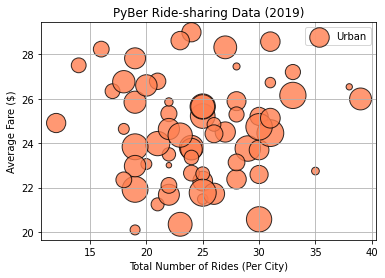

In [32]:
#Create the urban cities bubble chart

#Build the scatter plots for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

# Create lables for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# # Create the title.
plt.title("PyBer Ride-sharing Data (2019)")

#Add a grid
plt.grid(True)

#Add a legend
plt.legend()



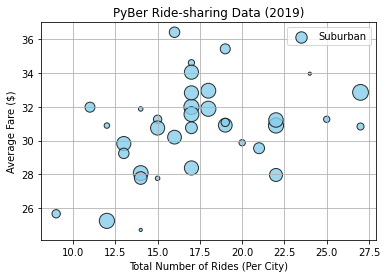

In [33]:
#Create the suburban cities bubble chart

#Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

# Create lables for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# # Create the title.
plt.title("PyBer Ride-sharing Data (2019)")

#Add a grid
plt.grid(True)

#Add a legend
plt.legend()

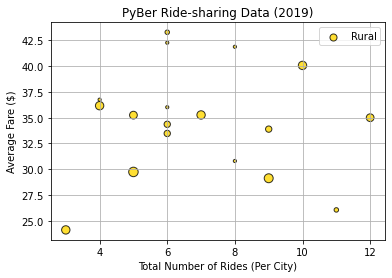

In [34]:
#Create the rural cities bubble chart

#Build the scatter plots for rural cities
plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Create lables for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# # Create the title.
plt.title("PyBer Ride-sharing Data (2019)")

#Add a grid
plt.grid(True)

#Add a legend
plt.legend()

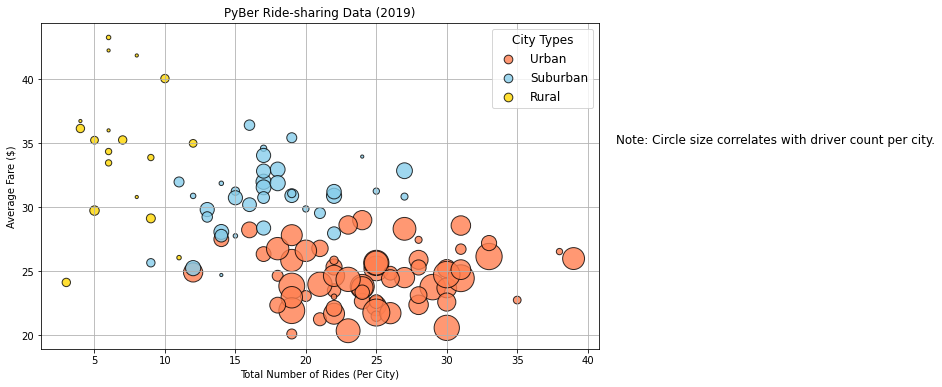

In [35]:
#Add the scatter charts for each type of the city
#Increase font size
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

#Incorporate the other graph properties for title, labels and grid
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-sharing Data (2019)")
plt.grid(True)

#Create (customize) the legend
lgnd=plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


#Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


#Save the chart and show the plot
plt.savefig("analysis/Fig1.png")
plt.show()

In [36]:
#Statistics
#3 ways to calculate:
# The Pandas describe() function on the DataFrame or Series.
# The Pandas mean(), median(), and mode() methods on a Series.
# The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

In [37]:
#Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [38]:
# Skill Drill: create summary statistics for suburban and rural cities_df
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [39]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [40]:
# Get summary statistics
# calculate the summary statistics of the ride count for each city type  
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [41]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [42]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [43]:
#Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),3)

(24.62, 17.36, 6.944)

In [44]:
#Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.median(),3)

(24.0, 17.0, 6.0)

In [45]:
#Calculate the mode of the ride count for each city type
round(urban_ride_count.mode(),2),round(suburban_ride_count.mode(),2),round(rural_ride_count.mode(),3)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [46]:
#Get summary statistics using NumPy
#Import NumPy and the stats module from SciPy

import numpy as np
import scipy.stats as sts

In [47]:
#Calculate the mean, median and mode (measures of central tendency)
#Calculate the measures of cental tendency for the ride count for the urban cities

#Calculate the mean
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

#Calculate the median
median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

#Calculate the mode
mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [48]:
#Calculate the measures of cental tendency for the ride count for the suburban cities

#Calculate the mean
mean_suburban_ride_count=np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

#Calculate the median
median_suburban_ride_count=np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

#Calculate the mode
mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [49]:
#Calculate the measures of cental tendency for the ride count for the rural cities

#Calculate the mean
mean_rural_ride_count=np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

#Calculate the median
median_rural_ride_count=np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

#Calculate the mode
mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [50]:
#Get summary statistics for avg fares for each city

In [51]:
#Get the fares for urban cities
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [52]:
#Get the fares for suburban cities
suburban_fares=suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [53]:
#Get the fares for rural cities
rural_fares=rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [54]:
#Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [55]:
#Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [56]:
#Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares=np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares=sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [57]:
#Get the revenues for city types
#Get summary statistics for the number of drivers by city type

#Get the driver count data from the urban cities
urban_drivers=urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [58]:
#Get the driver count data from the suburban cities
suburban_drivers=suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [59]:
#Get the driver count data from the rural cities
rural_drivers=rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [60]:
#Skill Drill
#Calculate the measures of cental tendency for urban, suburban and rual drivers count using NumPy and SciPy statistics module.


#urban drivers
#Calculate the mean
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean for the drivers counts for urban trips is {mean_urban_drivers:.2f}.")
#Calculate the median
median_urban_drivers=np.median(urban_drivers)
print(f"The median for the drivers counts for urban trips is {median_urban_drivers}.")
#Calculate the mode
mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode for the drivers counts for urban trips is {mode_urban_drivers}.")



#Suburban drivers
#Calculate the mean
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean for the drivers counts for suburban trips is {mean_suburban_drivers:.2f}.")
#Calculate the median
median_suburban_drivers=np.median(suburban_drivers)
print(f"The median for the drivers counts for suburban trips is {median_suburban_drivers}.")
#Calculate the mode
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode for the drivers counts for suburban trips is {mode_suburban_drivers}.")

#Rural drivers
#Calculate the mean
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean for the drivers counts for rural trips is {mean_rural_drivers:.2f}.")
#Calculate the median
median_rural_drivers=np.median(rural_drivers)
print(f"The median for the drivers counts for rural trips is {median_rural_drivers}.")
#Calculate the mode
mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode for the drivers counts for rural trips is {mode_rural_drivers}.")



The mean for the drivers counts for urban trips is 36.68.
The median for the drivers counts for urban trips is 37.0.
The mode for the drivers counts for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean for the drivers counts for suburban trips is 13.71.
The median for the drivers counts for suburban trips is 16.0.
The mode for the drivers counts for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean for the drivers counts for rural trips is 4.30.
The median for the drivers counts for rural trips is 4.0.
The mode for the drivers counts for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


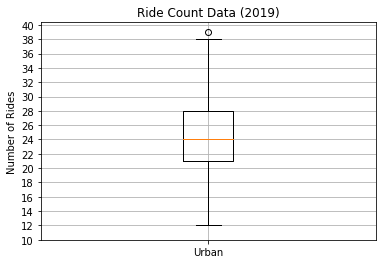

In [61]:
#Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#Add the title, y-axis and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


In [62]:
#Generate the corresponding summary statistics for the box-and-whisker plot visual
#Get summary statistics for urban
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

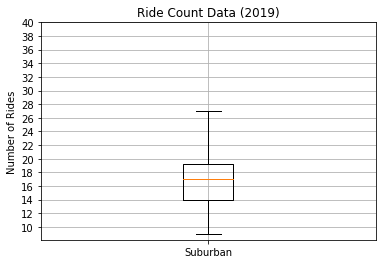

In [63]:
#Create a box-and-whisker plot for the suburban cities ride count.
x_labels=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#Add the title, y-axis and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


In [64]:
#Get summary statistics for suburban
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

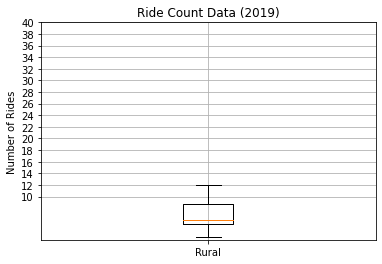

In [65]:
#Create a box-and-whisker plot for the rural cities ride count.
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#Add the title, y-axis and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [66]:
#Get summary statistics for rural
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

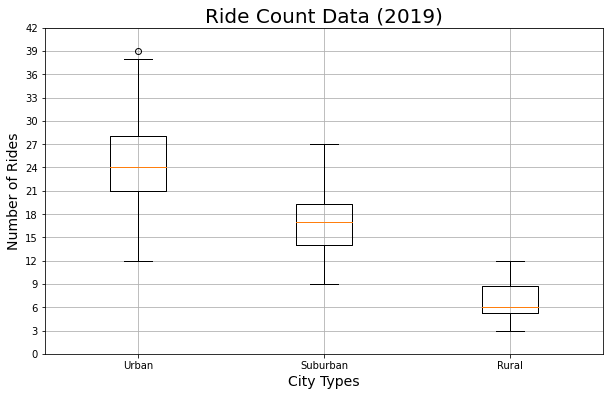

In [67]:
#Show all city type box and whisker plots on one chart

#Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()



In [68]:
#the outlier for the urban_ride_count is 39. From this information, we can find out which city has the highest rider count
#Filter city with outlier

#Get the city that matches 39
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


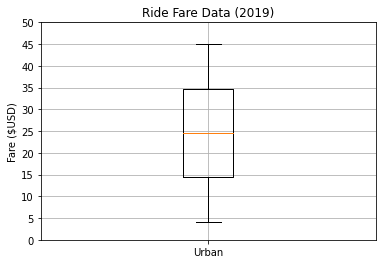

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [69]:
# Box-and-Whisker Plots for Ride Fare Data

#Create the box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fix,ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
#add the title, y-axis and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

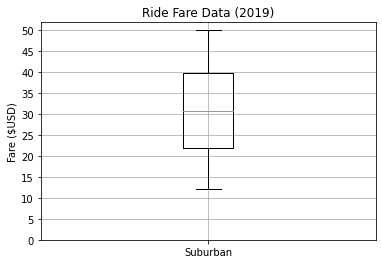

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [70]:
# Box-and-Whisker Plots for Ride Fare Data

#Create the box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fix,ax=plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
#add the title, y-axis and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

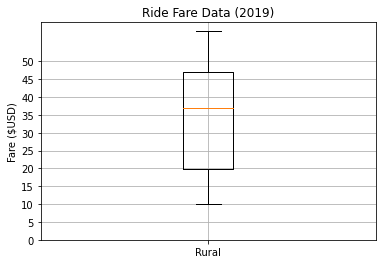

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [71]:
# Box-and-Whisker Plots for Ride Fare Data

#Create the box-and-whisker plot for the rural fare data
x_labels = ["Rural"]
fix,ax=plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
#add the title, y-axis and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

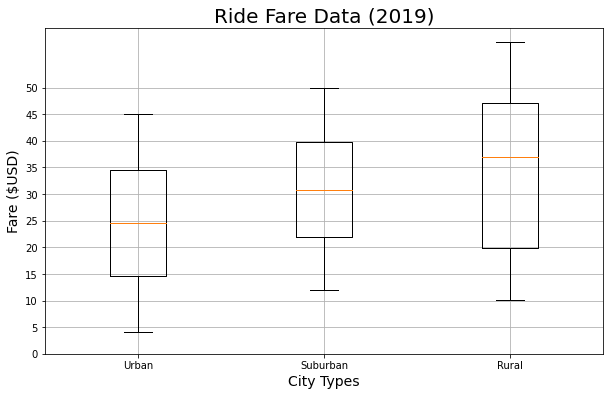

In [72]:
#Show all city type box and whisker plots on one chart

#Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()


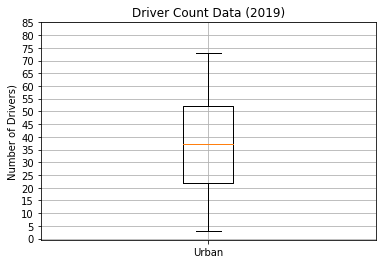

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [73]:
# Box-and-Whisker Plots for Driver Count Data

# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

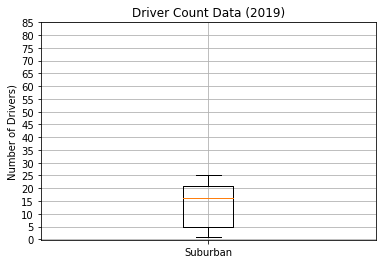

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [74]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

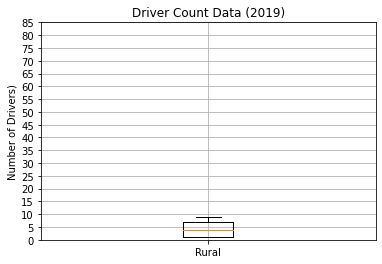

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [75]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

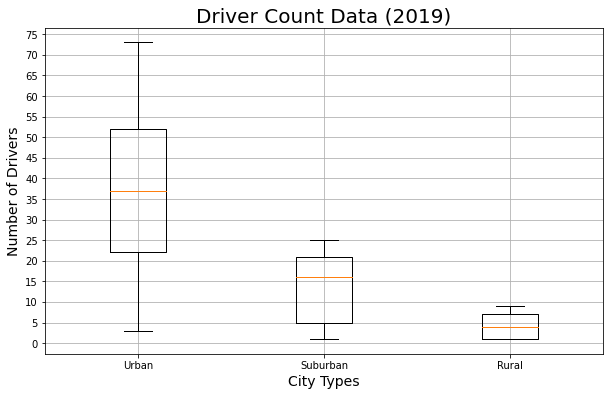

In [76]:
#Show all city type box and whisker plots on one chart

#Add all driver count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [77]:
#Create this pie chart with the following:
# Get the total fares for each city type.
# Get the total for all the fares for all the city types.
# Calculate the percentage of the total fares for each city type.


In [78]:
# Get the sum of the fares for each city type
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [79]:
#Get the sum of all the fares.
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [80]:
#Calculate the percentage of fare for each city type.
type_percents=100*sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [81]:
#combining the 3 lines of code into 1
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

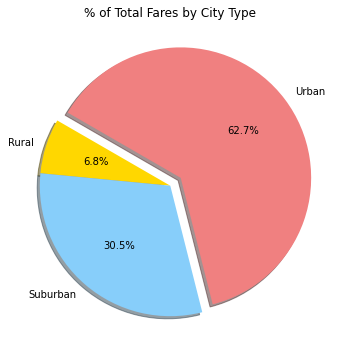

In [82]:
#Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#Change the default font size from 10 to 14
mpl.rcParams['font.size']=14

#Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

In [83]:
# Get the sum of total rides for each city type
# sum_total_rides_by_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
# sum_total_rides_by_type

In [84]:
#Get the sum of total rides.
# total_rides=pyber_data_df["ride_id"].count()
# total_rides

In [85]:
#Calculate the percentage of total rides for each city type.
# total_rides_percents=100*sum_total_rides_by_type/total_rides
# total_rides_percents

In [86]:
#Combine all 3 lines of code to 1
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

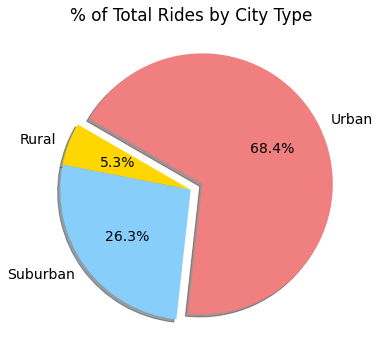

In [87]:
# Build the percentage of total rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
#Change the default font size from 10 to 14
mpl.rcParams['font.size']=14

#Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

In [88]:
# # Get the sum of total drivers for each city type.....should city_data_df be used???? has how many drivers
# sum_total_drivers_by_type=pyber_data_df.groupby(["type"]).sum()["driver_count"]
# sum_total_drivers_by_type

In [89]:
# #Get the sum of total drivers....should city_data_df be used?????
# total_drivers=pyber_data_df["driver_count"].sum()
# total_drivers

In [90]:
# #Calculate the percentage of total drivers for each city type.
# total_drivers_percents=100*sum_total_drivers_by_type/total_drivers
# total_drivers_percents

In [95]:
#combine 3 lines of code into 1
# Calculate the percentage of drivers for each city type.
#******Question: why are is city_data_df being used and not pyber_data_df...get different results when using pyber

driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

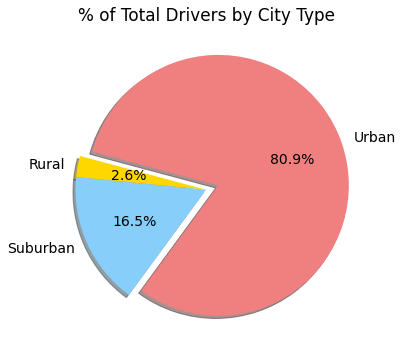

In [98]:
# Build the percentage of total drivers by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
#Change the default font size from 10 to 14
mpl.rcParams['font.size']=14

#Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()